# Downloading Numerical Model Forecasts

In [1]:
# import all necessary libraries
import os
from datetime import datetime, timedelta
import getpass
import xarray as xr
!python -m pip install motuclient==1.8.4 --no-cache-dir
import motuclient
import xarray as xr
import numpy as np
!python -m pip install ffmpeg==1.4
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import pandas as pd
import dotenv
dotenv.load_dotenv("dev.env")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for motuclient: filename=motuclient-1.8.4-py3-none-any.whl size=32873 sha256=0202054c9e22b25659da1e4a6858d9980632f76e88f6df373e85ef39ec7e5f86
  Stored in directory: /tmp/pip-ephem-wheel-cache-8jiqg85e/wheels/46/74/d1/ee3216f52d83212f10a0a5f5b94f3d99cf3d29b8ecf09c60b6
Successfully built motuclient
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=28d1ad65f2038dbe2f18b8820b2c8cd5da7b5d7dc8594bf5fcb5c1b36f3342e3
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Script to download the numerical forecasts from copernicus from copernicus.

In [3]:
# this is the directory that will be created
path = r'/content/drive/MyDrive/MasterThesis/Data/Numerical_Forecasts'

#use os.mkdir() to create the directory
isExist = os.path.exists(path)
if not isExist:
    os.mkdir(path)

# Copernicus Marine Credentials
USERNAME = os.getenv("CMEMS_USERNAME")
PASSWORD = os.getenv("CMEMS_PASSWORD")

# Work directory
out_dir = path

# product and dataset IDs
serviceID = "BALTICSEA_ANALYSISFORECAST_BGC_003_007"
productID = "cmems_mod_bal_bgc_anfc_P1D-m"

# variable
var1 = "chl" # Mass concentration of chlorophyll a in sea waterchl [mg/m3]

#coordinates
lon = (9.25 , 30.25) # 9.25 to 30.25
lat = (53.25 , 65.85) #  53.25 to 65.85


# Boundary dates
start_date = datetime(2023, 6, 10, 0)
end_date = datetime(2023, 7, 3, 23)


# delta time
delta_t = start_date-end_date   # d+daydays to download by request

-24 days, 1:00:00


In [4]:
# Output filename
out_name = f"CHL_NumForecast_data_{start_date.day}{start_date.month}{start_date.year}_to_{end_date.day}{end_date.month}{end_date.year}.nc"

# Motuclient command line
query = f'python -m motuclient --motu https://nrt.cmems-du.eu/motu-web/Motu \
--service-id BALTICSEA_ANALYSISFORECAST_BGC_003_007-TDS --product-id cmems_mod_bal_bgc_anfc_P1D-m \
--date-min {start_date} --date-max {end_date} \
--depth-min 0.5 --depth-max 0.52 \
--variable chl \
--out-dir {out_dir} --out-name {out_name} --user {USERNAME} --pwd {PASSWORD}'

print(f"============== Running request on {start_date} ==============")
# print(query[:-30])

# Run the command
#os.system(query)

result = subprocess.run(query, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output = result.stdout.decode('utf-8')
error = result.stderr.decode('utf-8')


print(f"============== Download completed! All files are in your directory {out_dir} ==============")

============== Running request on 2023-06-03 00:00:00 ==============
============== Download completed! All files are in your directory /content/drive/MyDrive/MasterThesis/Data/Numerical_Forecasts ==============


### Test that files contain data

In [7]:
start_date = datetime(2023, 6, 3, 0)
end_date = datetime(2023, 6, 30, 23)
out_name = f"CHL_NumForecast_data_{start_date.day}{start_date.month}{start_date.year}_to_{end_date.day}{end_date.month}{end_date.year}.nc"
ds2 = xr.open_mfdataset(f"{out_dir}/{out_name}")
ds2

<xarray.Dataset>
Dimensions:  (depth: 1, time: 26, lat: 774, lon: 763)
Coordinates:
  * depth    (depth) float32 0.5016
  * lon      (lon) float32 9.041 9.069 9.097 9.125 ... 30.13 30.15 30.18 30.21
  * time     (time) datetime64[ns] 2023-06-03T12:00:00 ... 2023-06-28T12:00:00
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 65.84 65.86 65.87 65.89
Data variables:
    chl      (time, depth, lat, lon) float32 dask.array<chunksize=(26, 1, 774, 763), meta=np.ndarray>
Attributes: (12/20)
    comment:                                    Data on cropped native produc...
    grid_resolution:                            ~1 nautical mile (1min latitu...
    title:                                      CMEMS ERGOM daily integrated ...
    Conventions:                                CF-1.0
    source:                                     CMEMS BAL MFC NEMO model outp...
    contact:                                    servicedesk.cmems@mercator-oc...
    ...                                         ...
    FROM_ORIGINAL_FILE__northernmost_latitude:  65.89099
    FROM_ORIGINAL_FILE__westernmost_longitude:  9.041488
    FROM_ORIGINAL_FILE__southernmost_latitude:  53.008297
    start_date:                                 2023-06-28 12:00:00
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    history:                                    Data extracted from dataset h...

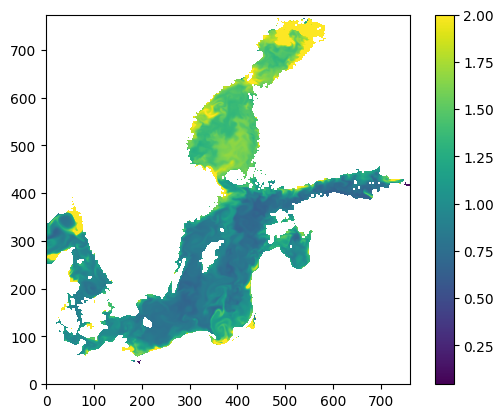

In [ ]:
plt.imshow(ds2.chl[1,0,:,:], origin='lower', vmax=2)
plt.colorbar()
plt.show()